Importing the libraries 

In [6]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install sklearn.model

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 3.9 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 4.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 4.8 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 5.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 4.8 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.8 MB/s  0:00:01

   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- --------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Loading the Dataset

In [23]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv("googl_data_2020_2025.csv")
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


Data Cleaning

In [30]:
df = df.drop(index=[0, 1])

In [31]:
df.rename(columns={'Price': 'Date'}, inplace=True)


In [32]:
df['Date'] = pd.to_datetime(df['Date'])


In [33]:
cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df[cols] = df[cols].astype(float)


In [34]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 2 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1258 non-null   datetime64[ns, UTC]
 1   Adj Close  1258 non-null   float64            
 2   Close      1258 non-null   float64            
 3   High       1258 non-null   float64            
 4   Low        1258 non-null   float64            
 5   Open       1258 non-null   float64            
 6   Volume     1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 68.9 KB


,Date,Adj Close,Close,High,Low,Open,Volume
2,2020-01-02 00:00:00+00:00,68.186821,68.433998,68.433998,67.324501,67.420502,27278000.0
3,2020-01-03 00:00:00+00:00,67.830101,68.075996,68.687500,67.365997,67.400002,23408000.0
4,2020-01-06 00:00:00+00:00,69.638054,69.890503,69.916000,67.550003,67.581497,46768000.0
5,2020-01-07 00:00:00+00:00,69.503548,69.755501,70.175003,69.578003,70.023003,34330000.0
6,2020-01-08 00:00:00+00:00,69.998253,70.251999,70.592499,69.631500,69.740997,35314000.0


Data Analysis 

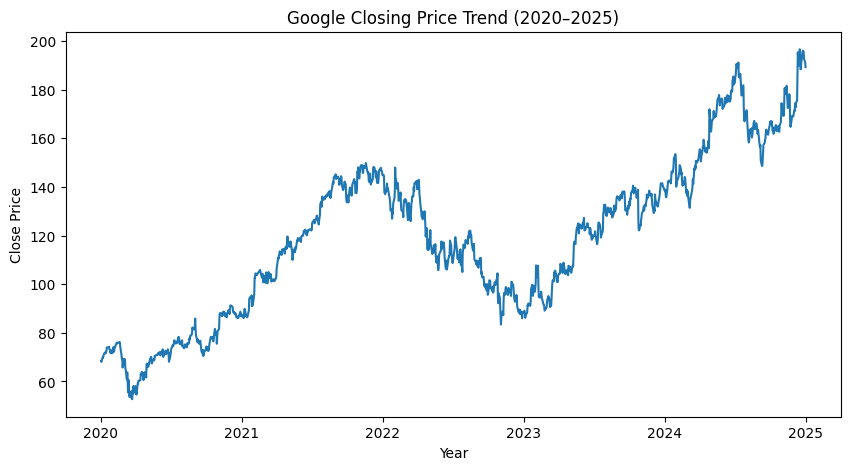

In [35]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title("Google Closing Price Trend (2020–2025)")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.show()

Feature Selection & Target Variable

In [36]:
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [44]:
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [45]:
y_pred = model.predict(X_test)

Model Evaluation

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.17898876887102302
RMSE: 0.4456553237759395
R2 Score: 0.9998120943010242


Actual vs Predicted Graph

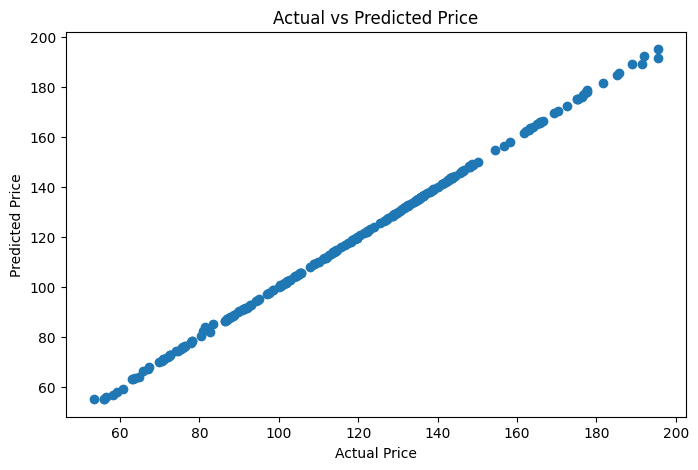

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()
